In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [61]:
train = pd.read_csv('train_data.csv')
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [81]:
# 유저별 태그별 푼 문제 수
by_tag = train.groupby(['userID', 'KnowledgeTag'])['Timestamp'].count()
by_tag

userID  KnowledgeTag
0       23              4
        25              1
        26              7
        30              3
        31              1
                       ..
7440    7691            4
        10313           1
        10328           1
7441    438             5
        8836            4
Name: Timestamp, Length: 440802, dtype: int64

언뜻 보기엔 시간 순으로 정답률을 보기엔 문제 수가 너무 적어보인다. 가장 많이 푼 유저를 찾아 태그별 문제 수의 분포를 봐야겠다.

In [82]:
# 유저 별 푼 문제 수
train.groupby('userID')['assessmentItemID'].count().sort_values()

userID
7441       9
7390      13
7414      13
7252      13
7396      14
        ... 
926     1773
394     1774
1112    1777
481     1847
730     1860
Name: assessmentItemID, Length: 6698, dtype: int64

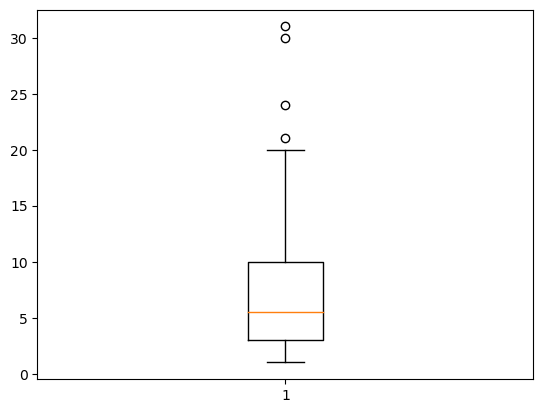

In [83]:
fig, ax = plt.subplots()
ax.boxplot(by_tag.loc[730])
plt.show()

문제를 가장 많이 푼 유저기준으로 보아도 시간별 정답률을 구하기엔 문제 수의 분포가 너무 적은 쪽에 몰려있는 듯 하다. 만약 문제를 얼마 풀지 않은 유저 기준으로는 더더욱이나 시간별 정답률을 구하기 힘들어보인다.

그래서 유저를 고려하지 않고 태그별 시간 순서 정답률을 구해보았다.

In [84]:
# 태그별 시간 순서 answerCode
by_tag = train.groupby(['KnowledgeTag', 'Timestamp'])['answerCode'].sum().to_frame()
by_tag

answerCode
KnowledgeTag Timestamp                      
23           2020-01-03 04:31:14           1
             2020-01-03 04:31:16           1
             2020-01-03 04:31:18           1
             2020-01-03 04:31:23           0
             2020-01-24 05:42:17           0
...                                      ...
11271        2020-09-02 13:14:02           0
             2020-09-15 05:49:57           1
             2020-09-17 09:29:41           1
             2020-09-21 10:03:17           1
             2020-10-11 04:09:14           0

[2261552 rows x 1 columns]

In [85]:
# 정답률을 구하기 위해 cumsum을 진행하며 total # of solved를 누적해줄 column 생성
by_tag['num_solved'] = 1
by_tag

answerCode  num_solved
KnowledgeTag Timestamp                                  
23           2020-01-03 04:31:14           1           1
             2020-01-03 04:31:16           1           1
             2020-01-03 04:31:18           1           1
             2020-01-03 04:31:23           0           1
             2020-01-24 05:42:17           0           1
...                                      ...         ...
11271        2020-09-02 13:14:02           0           1
             2020-09-15 05:49:57           1           1
             2020-09-17 09:29:41           1           1
             2020-09-21 10:03:17           1           1
             2020-10-11 04:09:14           0           1

[2261552 rows x 2 columns]

In [86]:
by_tag = by_tag.groupby(level=0).cumsum()
by_tag['accuracy'] = by_tag['answerCode'] / by_tag['num_solved']
by_tag


answerCode  num_solved  accuracy
KnowledgeTag Timestamp                                            
23           2020-01-03 04:31:14           1           1  1.000000
             2020-01-03 04:31:16           2           2  1.000000
             2020-01-03 04:31:18           3           3  1.000000
             2020-01-03 04:31:23           3           4  0.750000
             2020-01-24 05:42:17           3           5  0.600000
...                                      ...         ...       ...
11271        2020-09-02 13:14:02         230         518  0.444015
             2020-09-15 05:49:57         231         519  0.445087
             2020-09-17 09:29:41         232         520  0.446154
             2020-09-21 10:03:17         233         521  0.447217
             2020-10-11 04:09:14         233         522  0.446360

[2261552 rows x 3 columns]

In [87]:
# 가장 많이 풀린 태그 찾기
train.groupby('KnowledgeTag')['assessmentItemID'].count().sort_values()

KnowledgeTag
2613       44
7125       45
2871       46
4978       46
5142       47
        ...  
8127     9006
7621     9709
2010    10176
7600    10734
7597    12892
Name: assessmentItemID, Length: 912, dtype: int64

In [88]:
# 필요없는 column drop하고 가장 많이 풀린 태그 정보 불러와 저장
by_tag = by_tag.drop(['answerCode', 'num_solved'], axis=1)
by_tag_7597 = by_tag.loc[7597] ; by_tag_7597

,accuracy
Timestamp,
2020-01-03 03:07:39,1.000000
2020-01-03 03:14:46,1.000000
2020-01-03 03:15:13,1.000000
2020-01-03 05:48:24,1.000000
2020-01-03 05:48:56,1.000000
...,...
2020-10-10 12:40:29,0.828518
2020-10-15 08:50:55,0.828454
2020-10-15 08:51:09,0.828467


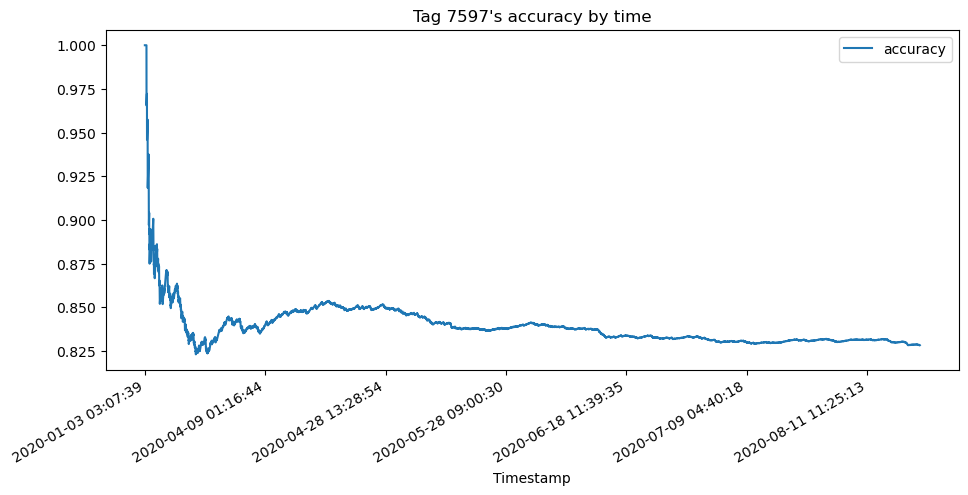

In [102]:
by_tag_7597.plot(figsize=(11, 5))

plt.title('Tag 7597\'s accuracy by time' )
plt.gcf().autofmt_xdate()
plt.show()

태그를 풀면 풀수록 모든 유저가 답을 계속 맞추지 않는 이상 정답률은 낮아질 수 밖에 없는 듯 하다.